# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo
import seaborn as sns

# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


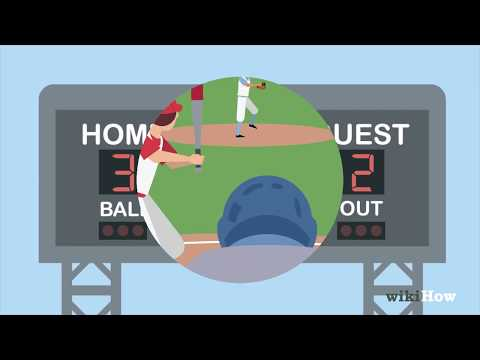

In [2]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:


In [3]:
#Opening the files:

people_path = Path('./data/baseballdatabank-2023/core/People.csv')
df_people = pd.read_csv(people_path)
display(df_people)

salaries_path = Path('./data/baseballdatabank-2023/contrib/Salaries.csv')
df_salaries = pd.read_csv(salaries_path)
display(df_salaries)

pitching_path = Path('./data/baseballdatabank-2023/core/Pitching.csv')
df_pitching = pd.read_csv(pitching_path)
display(df_pitching)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
20672,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
20673,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
20674,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50397,zastrro01,2022,1,NYN,NL,0,0,1,0,0,...,0.0,0,0.0,0,4.0,0,1,0.0,0.0,0.0
50398,zastrro01,2022,2,LAA,AL,0,0,5,0,0,...,0.0,1,0.0,0,12.0,1,3,0.0,0.0,0.0
50399,zerpaan01,2022,1,KCA,AL,2,1,3,2,0,...,0.0,1,0.0,0,44.0,0,3,0.0,0.0,1.0
50400,zeuchtj01,2022,1,CIN,NL,0,3,3,3,0,...,0.0,0,3.0,0,64.0,0,18,0.0,1.0,2.0


- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [4]:
# Remove all data after 2010:
salaries_filt2010 = df_salaries[df_salaries.yearID <= 2010].copy(deep=True) 
pitching_filt2010 = df_pitching[df_pitching.yearID <= 2010].copy(deep=True)

# Salaries drop
salaries_filt2010_nodup = salaries_filt2010.drop_duplicates(subset=['playerID', 'yearID'], keep='first', ignore_index=True).copy(deep=True)

# Show the difference in the dataframe size before and after the filtering
print('Before filtering: ', salaries_filt2010.groupby('yearID').playerID.size().sum())
print('After filtering: ', salaries_filt2010_nodup.groupby('yearID').playerID.size().sum())

Before filtering:  21454
After filtering:  21351


In [5]:
# Printing the size of each data frame
print(f'The size of each data set is for:\
      \ndf_people the shape is {(df_people.shape)}\
      \nfiltered_pitching the shape is {(pitching_filt2010.shape)}\
      \nfiltered_salaries the shape is {(salaries_filt2010_nodup.shape)}')

The size of each data set is for:      
df_people the shape is (20676, 24)      
filtered_pitching the shape is (40433, 30)      
filtered_salaries the shape is (21351, 5)


**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [6]:
# Visualizing the possible values of the throws column before filtering
print('The values of the throws column before filtering are:', df_people.throws.unique())

The values of the throws column before filtering are: ['R' 'L' nan 'S']


In [7]:
# Filtering the people dataframe by keeping only rows in which the throws has values R or L
people_filtLR = df_people[(df_people.throws =='L') | (df_people.throws == 'R')].copy(deep=True)
display(people_filtLR.head(4))

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01


In [8]:
# Verifying that the possible values of the throws column after filtering are only R or L
print('The values of the throws column before filtering are:', people_filtLR.throws.unique())

The values of the throws column before filtering are: ['R' 'L']


**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [9]:
# Left inner joining the people data frame onto the pitching one (we are populating the pitching data frame). Both of them were already filtered.
pitch_peo_merge = pd.merge(pitching_filt2010, people_filtLR, on='playerID', how='left').copy(deep=True)
display(pitch_peo_merge)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,Brainard,Asahel,150.0,68.0,NaN,R,1871-05-05,1874-10-14,braia102,brainas01
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,Ferguson,Robert Vavasour,149.0,69.0,B,R,1871-05-18,1884-07-01,fergb101,fergubo01
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,Fisher,William Charles,164.0,69.0,R,R,1871-05-06,1878-07-09,fishc102,fishech01
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Zambrano,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Ziegler,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Zimmermann,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Zito,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01


**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

The percentage of data missing for the year 1892 is 4.55%


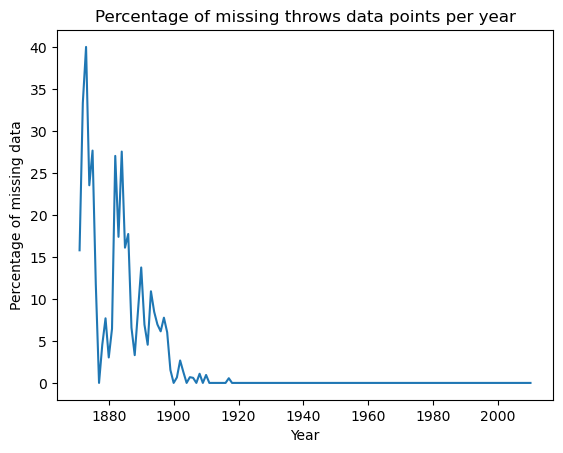

In [10]:
# Estimatation of percentage of missing throws data points per year and show estimates in a line plot
perc_missing_throws = pitch_peo_merge.groupby('yearID')['throws'].apply(lambda x: x.isna().sum()/len(x)*100)
perc_missing_throws.plot.line(xlabel = 'Year', ylabel = 'Percentage of missing data', title = 'Percentage of missing throws data points per year')

# Estimatation of percentage of missing throws data in 1892
print(f"The percentage of data missing for the year 1892 is {perc_missing_throws.loc[1892] :.2f}%")

**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [11]:
# Filtering the pitch_peo_merge frame of before to keep data from year 1920 inlcuded
pitch_peo_filt1920 = pitch_peo_merge[pitch_peo_merge.yearID >= 1920].copy(deep=True)
display(pitch_peo_filt1920)

# Filtering the salaries data frame to keep data from year 1920 inlcuded
salaries_filt1920 = salaries_filt2010_nodup[salaries_filt2010_nodup.yearID >= 1920].copy(deep = True)
display(salaries_filt1920)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
6552,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,Acosta,Jose,134.0,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01
6553,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,Adams,Charles Benjamin,185.0,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01
6554,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,Alexander,Grover Cleveland,185.0,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01
6555,altener01,1920,1,DET,AL,0,1,14,1,0,...,Alten,Ernest Matthias,175.0,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01
6556,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,Ayers,Yancey Wyatt,185.0,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Zambrano,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Ziegler,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Zimmermann,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Zito,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
21346,2010,WAS,NL,walkety01,650000
21347,2010,WAS,NL,wangch01,2000000
21348,2010,WAS,NL,willijo03,4600000
21349,2010,WAS,NL,zimmejo01,401000


**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [12]:
# Left inner merging the salaries data frame onto the pitch_peo one (we are populating the pitch_peo data frame). Both of them were already filtered.
pitch_peo_sal = pd.merge(pitch_peo_filt1920, salaries_filt1920, on = ['playerID', 'yearID', 'teamID', 'lgID'], how = 'left').copy(deep= True)
display(pitch_peo_sal)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,Jose,134.0,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01,NaN
1,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,Charles Benjamin,185.0,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01,NaN
2,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,Grover Cleveland,185.0,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01,NaN
3,altener01,1920,1,DET,AL,0,1,14,1,0,...,Ernest Matthias,175.0,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01,NaN
4,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,Yancey Wyatt,185.0,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


The percentage of data missing for the year 2002 is 41.88%


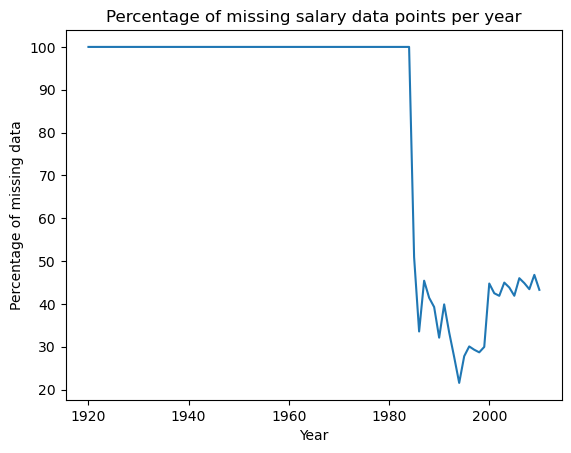

In [13]:
# Estimation of the percentage of missing salary data points per year and show estimates in a line plot 
perc_missing_salary = pitch_peo_sal.groupby('yearID')['salary'].apply(lambda x: x.isna().sum()/len(x)*100)
perc_missing_salary.plot.line(xlabel = 'Year', ylabel = 'Percentage of missing data', title = 'Percentage of missing salary data points per year')

# Estimation of the percentage of missing salary data missing in 2002
print(f"The percentage of data missing for the year 2002 is {perc_missing_salary.loc[2002]:.2f}%")

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [14]:
# Finding and printing the first and last year with any salary data 
year_with_salaries = perc_missing_salary[perc_missing_salary != 100]
print("The first year with salarial data: ", year_with_salaries.keys()[0])
print("The last year with salarial data: ", year_with_salaries.keys()[-1])

# Filtering the pitch_peo_sal data frame to keep only data between above defined dates
pitch_peo_sal_filtsal = pitch_peo_sal[(pitch_peo_sal.yearID >= year_with_salaries.keys()[0]) &
                                      (pitch_peo_sal.yearID <= year_with_salaries.keys()[-1])].copy(deep=True)
display(pitch_peo_sal_filtsal)

The first year with salarial data:  1985
The last year with salarial data:  2010


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
18432,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN
18433,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,Johnny Ray,185.0,72.0,R,R,1985-09-04,1985-10-03,abrej001,abregjo01,NaN
18434,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,James Justin,210.0,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,170000.0
18435,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,Juan Roberto,190.0,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,147500.0
18436,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,Richard Warren,195.0,76.0,R,R,1985-06-12,2000-09-06,aguir001,aguilri01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,18500000.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [15]:
# Loading and showing the dataframe for task 2
df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

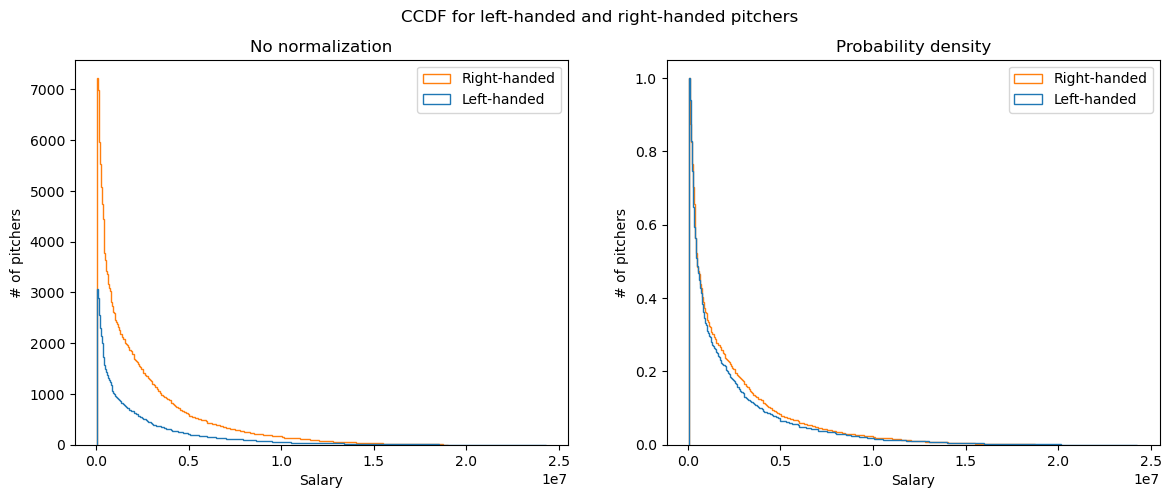

In [16]:
# Defining the color palette that will be used throughout the whole notebook
col_palette = {'R': 'tab:orange', 'L': 'tab:blue'}

# First, we will remove the NaN from the salary
salaries_R = df.salary[df.throws == 'R'].dropna()
salaries_L = df.salary[df.throws == 'L'].dropna()

# Defining plotting setups
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (14,5), sharex=True)

# Plotting CCDF of left- and right-handed pitcher not normalized by total count (density=False)
# Also customizing titles, axis labels and legend
ax1.hist(salaries_R, bins=500, histtype="step", density=False, cumulative=-1, label='Right-handed', color='tab:orange')
ax1.hist(salaries_L, bins=500, histtype="step", density=False, cumulative=-1, label='Left-handed', color='tab:blue')
ax1.set_xlabel('Salary')
ax1.set_ylabel('# of pitchers')
ax1.set_title('No normalization')
ax1.legend()

# Plotting CCDF of left- and right-handed pitcher normalized by total count (density=True)
# Also customizing titles, axis labels and legend
ax2.hist(salaries_R, bins=500, histtype="step", density=True, cumulative=-1, label='Right-handed', color='tab:orange')
ax2.hist(salaries_L, bins=500, histtype="step", density=True, cumulative=-1, label='Left-handed', color='tab:blue')
ax2.set_xlabel('Salary')
ax2.set_ylabel('# of pitchers')
ax2.set_title('Probability density')
ax2.legend()

# Adding title to the subplot figure and showing the plots
fig.suptitle('CCDF for left-handed and right-handed pitchers')
plt.show()

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

<span style="color:green">OUR ANSWER:

By plotting the cumulative distribution for both left- and right-handed pitchers, we observed that the number of the left-handed pitchers is lower. With this in mind, we cannnot directly compare the two distributions and extract meaningful insights. To be able to compare the distributions we then normalized the data by plotting the probability density (as shown in 2.1).

Even after normalization, we cannot depict clear differences between the right-handed and the left-handed athletes since, using this scale now, the distributions overlap.

This is common for distributions of data where the very large values are, as said on the course, "not very rare". Based on the perception theory, it would be easier to distinguish if we could compare slopes. Thus, we would need to apply a transformation to the axes in order to try to obtain a straight line and better compare the tails of the distribution (the larger values in the x-axis). Apparently, by visual inspection, the data seems to be a power-law, so applying a log-log transformation would fix the problem. However, this data could also follow an exponential function (they are difficult to distinguish visually), in which case, applying log-log transformation would create another exponential but concave. To obtain a straight line in the case the data was exponential, we just need to apply the log to the y-axis. By doing this, we expect to better be able to observe differences between the left- and right-handed pitchers.

(Note: After working with the data in 2.3, we discovered the distribution is actually an exponential, so we applied a log scale to the y-axis).

Another way to compare the distributions of the salaries within each subset (right-handed vs left-handed) is to additionally use boxplots. This would give us an idea on how the data distributes, since by showing the median and quartiles, we can know where the 50% and 75%, respectively, of the data fall. It also shows potential outliers. It could complement the probability information obtained from the CCDF.

**2.3 —** Implement the solution proposed by yourself in the previous question.

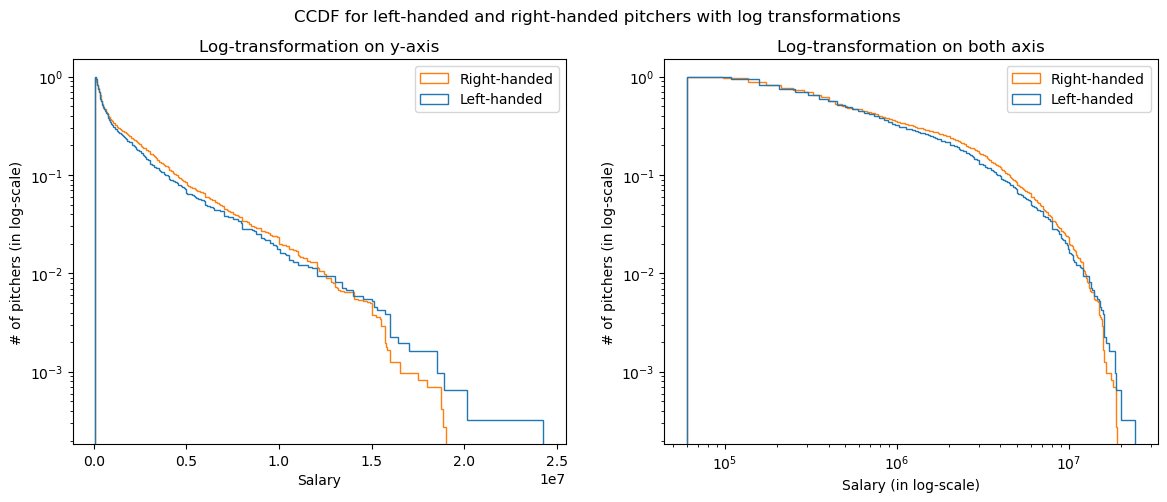

In [17]:
# Defining plotting setups
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

# Plotting CCDF of left- and right-handed pitcher normalized by total count (density=True) with log scale on y-axis
# Also customizing titles, axis labels and legend
ax1.hist(salaries_R, bins=500, histtype="step", density=True, cumulative=-1, label='Right-handed', log=True, color='tab:orange')
ax1.hist(salaries_L, bins=500, histtype="step", density=True, cumulative=-1, label='Left-handed', log=True, color='tab:blue')
ax1.set_xlabel('Salary')
ax1.set_ylabel('# of pitchers (in log-scale)')
ax1.set_title('Log-transformation on y-axis')
ax1.legend()

# Plotting CCDF of left- and right-handed pitcher normalized by total count (density=True) with log scale on both axis.
# Also customizing titles, axis labels and legend
ax2.hist(salaries_R, bins=500, histtype="step", density=True, cumulative=-1, label='Right-handed', log=True, color='tab:orange')
ax2.hist(salaries_L, bins=500, histtype="step", density=True, cumulative=-1, label='Left-handed', log=True, color='tab:blue')
ax2.set_xscale('log')
ax2.set_xlabel('Salary (in log-scale)')
ax2.set_ylabel('# of pitchers (in log-scale)')
ax2.set_title('Log-transformation on both axis')
ax2.legend()

# Adding title to the subplot figure and showing the plots
fig.suptitle('CCDF for left-handed and right-handed pitchers with log transformations')
plt.show()

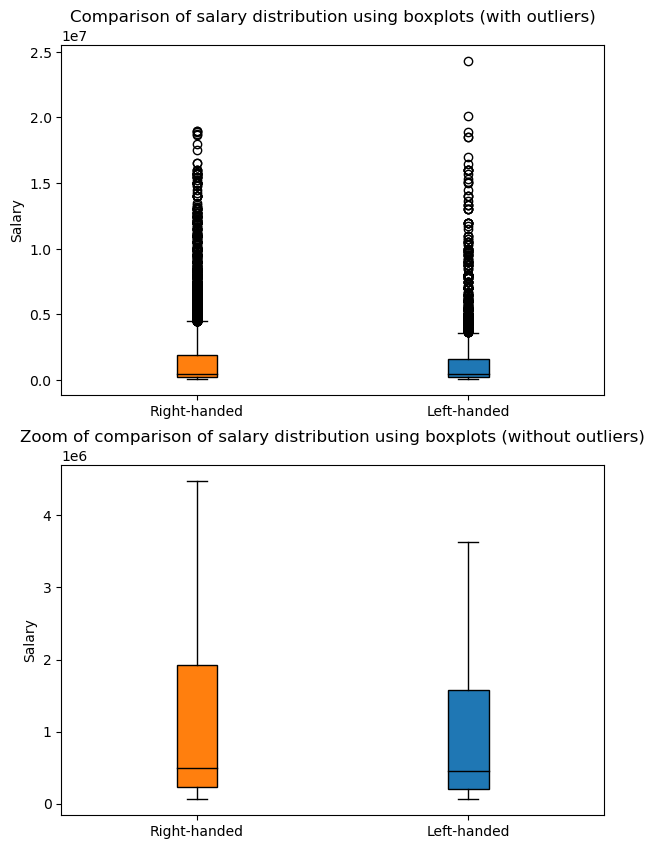

In [18]:
# Defining plotting setups
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7,10))
ax=ax.flatten()

# Comparing the density of the distribution of the values using a boxplot for additional information: creating the boxplots
boxplot1 = ax[0].boxplot(salaries_R, positions=[1], labels=['Right-handed'], showfliers=True, patch_artist=True, boxprops=dict(facecolor='tab:orange'))
boxplot2 = ax[0].boxplot(salaries_L, positions=[2], labels=['Left-handed'], showfliers=True, patch_artist=True, boxprops=dict(facecolor='tab:blue'))
boxplot3 = ax[1].boxplot(salaries_R, positions=[1], labels=['Right-handed'], showfliers=False, patch_artist=True, boxprops=dict(facecolor='tab:orange'))
boxplot4 = ax[1].boxplot(salaries_L, positions=[2], labels=['Left-handed'], showfliers=False, patch_artist=True, boxprops=dict(facecolor='tab:blue'))

# Setting the median line color back to black
for boxplot in [boxplot1, boxplot2, boxplot3, boxplot4]:
    for median in boxplot['medians']:
        median.set(color='black')

# Adding labels to the axis of the plots, adding title and plotting
ax[0].set_ylabel('Salary')
ax[1].set_ylabel('Salary')
ax[0].set_title('Comparison of salary distribution using boxplots (with outliers)')
ax[1].set_title('Zoom of comparison of salary distribution using boxplots (without outliers)')
plt.show()

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

<span style="color:green">OUR ANSWER:

As mentioned in section 2.2, by applying the log transformations we have seen that the data is exponentially distributed since the data has a concave curvature when using the log-log visualization.

The CCDF value for a certain salary tells us the probability to find a higher value than that salary. For the values of salary up until around 1.5e7, the probability of finding that salary is approximately the same for right and left-handed players as the trend of the CCDF is similar. The median and quartiles are quite similar for right-handed and left-handed players as seen in the right boxplot. For the higher salaries (higher than 1.5e7), there is a very low density of them. They can be regarded as outliers.

Despite the CCDF showing a higher probability to find higher salary values for the left-hand players, the boxplots show they are outliers, they are rare cases. Moreover, it looks like the median and the upper quartile are a little bit lower for the left-hand players, suggesting that 75% of the salaries for the right-hand players are slightly superior. This is shown in the CCDF plot where the blue line depicting the right-hand players is above the line for the left-hand players (up until 1.5e7 in the salary value).

In conclusion, showing that the left-handed pitcher with high salaries correspond to outliers, it's not enough to tell Mr. Russo whether he should invest in left-handed pitchers. To discern whether these observations are significant, we need to quantify uncertainty.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

In [19]:
gigi2 = df.groupby(['yearID', 'playerID'])['BAOpp'].agg('size')
ciao = gigi2[gigi2.values == 4].keys()
ciao

MultiIndex([(2000, 'holmeda01'),
            (2003, 'micelda01'),
            (2007,   'kimby01')],
           names=['yearID', 'playerID'])

In [20]:
df[(df.yearID == 2007) & (df.playerID == 'kimby01')]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
561,kimby01,2007,2,FLO,NL,5,3,14,13,0,...,Byung-Hyun,176.0,71.0,R,R,1999-05-29,2007-09-28,kim-b001,kimby01,2500000.0
5548,kimby01,2007,1,COL,NL,1,2,3,1,0,...,Byung-Hyun,176.0,71.0,R,R,1999-05-29,2007-09-28,kim-b001,kimby01,2500000.0
7060,kimby01,2007,3,ARI,NL,0,1,2,2,0,...,Byung-Hyun,176.0,71.0,R,R,1999-05-29,2007-09-28,kim-b001,kimby01,2500000.0
8187,kimby01,2007,4,FLO,NL,4,2,9,6,0,...,Byung-Hyun,176.0,71.0,R,R,1999-05-29,2007-09-28,kim-b001,kimby01,2500000.0


<span style="color:red"> THERE ARE PEOPLE THAT, WHEN GROUPING BY, HAVE MORE SALARIES THAN 1 BUT IT'S THE SAME. MUST BE CHECKED --> THEN ELIMINATE THE PREVIOUS TWO ROWS

In [42]:
# Calculating the mean salary and 95% CI for left- and right-handed pitchers and saving data
df_avg_salary_stats = df.groupby(['throws'])['salary'].agg(['mean', 'sem'])
df_avg_salary_stats['Low_bound'] = df_avg_salary_stats['mean']-1.96*df_avg_salary_stats['sem']
df_avg_salary_stats['Upp_bound'] = df_avg_salary_stats['mean']+1.96*df_avg_salary_stats['sem']
df_avg_salary_stats.drop(columns='sem', inplace=True)

# Printing the mean salary and 95% CI for left- and right-handed pitchers
print(f'The mean salary for left-handed pitchers is {(df_avg_salary_stats.loc["L"]["mean"]):.2e}'
      f' with a confidence interval in the range ({(df_avg_salary_stats.loc["L"]["Low_bound"]):.2e}, {(df_avg_salary_stats.loc["L"]["Upp_bound"]):.2e})')
print(f'The mean salary for right-handed pitchers is {(df_avg_salary_stats.loc["R"]["mean"]):.2e}'
      f' with a confidence interval in the range ({(df_avg_salary_stats.loc["R"]["Low_bound"]):.2e}, {(df_avg_salary_stats.loc["R"]["Upp_bound"]):.2e})')

The mean salary for left-handed pitchers is 1.44e+06 with a confidence interval in the range (1.35e+06, 1.52e+06)
The mean salary for right-handed pitchers is 1.60e+06 with a confidence interval in the range (1.54e+06, 1.65e+06)


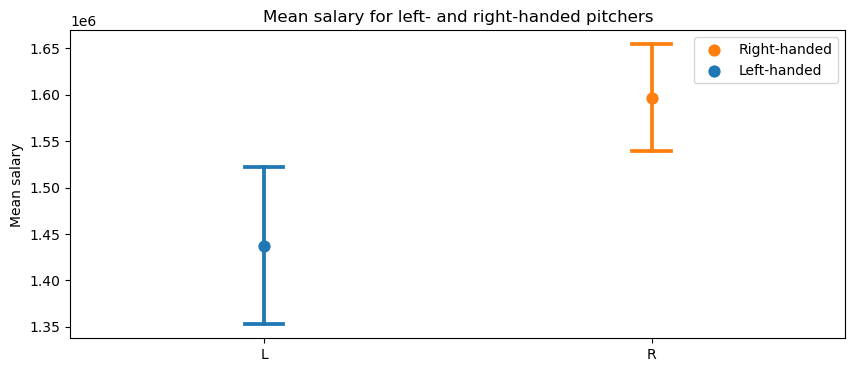

In [22]:
# Define a dictionary to map existing labels to custom names
custom_labels = {'R': 'Right-handed', 'L': 'Left-handed'}
# Defining plotting setups
fig, ax = plt.subplots(figsize=(10,4))

# Plotting the left- and right-handed mean salaries. Also customizing titles, axis labels and legend
sns.pointplot(data = df.dropna(subset=['salary']), x = 'throws', y = 'salary', errorbar=('se', 1.96),
              hue='throws', ax=ax, palette=col_palette, hue_order=['R','L'], capsize=.1)
ax.set_xlabel('')
ax.set_ylabel('Mean salary')
ax.set_title('Mean salary for left- and right-handed pitchers')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [custom_labels.get(label) for label in labels], title='')

# Plotting
plt.show()

**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

<span style="color:green"> OUR ANSWER:

From the plots in section 2.5 there seems to be a difference bewteen the means of the distributions. This can be infered as the values are different and the confidence interval are not overlapping. However, to see if it's statistically significant, we could quantify uncertainty and evaluate based on the effect size.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

In [43]:
# Loading the statistical libraries
from scipy import stats

# Performing statistical testing to compare left- VS right-handed salaries distributions. We assume equal variance
# and perform two-sided t-test to check as the null hypothesis is that the distributions have identical average 
salaries_t_test = stats.ttest_ind(df.salary[df.throws == 'L'].dropna(), df.salary[df.throws == 'R'].dropna())
print(f'The t-test that compares the salaries of left- and right-handed pitchers has a p-value of {(salaries_t_test[1]):.4f}')

# Printing the mean salaries for the two distributions 
mean_salaries = df.groupby('throws')['salary'].mean()
print(f'The mean salary for the right-handed pitchers is: {(mean_salaries.loc["R"]):.2e}')
print(f'The mean salary for the left-handed pitchers is: {(mean_salaries.loc["L"]):.2e}')

The t-test that compares the salaries of left- and right-handed pitchers has a p-value of 0.0026
The mean salary for the right-handed pitchers is: 1.60e+06
The mean salary for the left-handed pitchers is: 1.44e+06


<span style="color:green"> OUR ANSWER: 

The p-value being smaller than 0.05 indicates that we could reject the null hypothesis: the average salaries are not identical. By looking at the means, it seems that the right-handed pitchers tends to earn more. However, the p-value only allows us to reject H0 which is not sufficient to imply that the right-handed pitchers mean is higher. 

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [24]:
# Filtering the data frame to have players with at least 5 games 
df_filt5games = df[df.G > 4].copy(deep=True)

# Computing the mean OBA score for left- and right-handed pitchers
mean_right = df_filt5games.BAOpp[df_filt5games.throws == 'R'].mean()
mean_left = df_filt5games.BAOpp[df_filt5games.throws == 'L'].mean()
print(f'The mean OBA for the right-handed players is {mean_right:.4} and for the left-handed players is {mean_left:.4}')

# Performing statistical testing to compare left- VS right-handed OBA distributions. We assume equal variance
# and perform two-sided t-test to check as the null hypothesis is that the distributions have identical average 
BAO_t_test = stats.ttest_ind(df_filt5games.BAOpp[df_filt5games.throws == 'L'].dropna(), df_filt5games.BAOpp[df_filt5games.throws == 'R'].dropna())
print(f'The t-test that compares the OBA of left- and right-handed pitchers has a p-value of {BAO_t_test[1]:.4f}')

The mean OBA for the right-handed players is 0.2678 and for the left-handed players is 0.2704
The t-test that compares the OBA of left- and right-handed pitchers has a p-value of 0.0059


<span style="color:green">OUR ANSWER:

According to the result of the t-test, the null hypothesis can be rejected considering the p-value below 0.05. However, as in section 2.7, this is not sufficient to say that, based on the average OBA, that the right-handed players are better pitchers. More analysis should be performed to consider this obervation.

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

In [44]:
# Building a data frame containing only data from year 2000
df_filt2000 = df[df.yearID == 2000].copy(deep=True)

# Performing statistical testing to compare left- VS right-handed salaries distributions in year 2000. We assume equal variance
# and perform two-sided t-test to check as the null hypothesis is that the distributions have identical average 
salaries_filt2000_t_test = stats.ttest_ind(df_filt2000.salary[df_filt2000.throws == 'L'].dropna(), df_filt2000.salary[df_filt2000.throws == 'R'].dropna())
print(f'The t-test that compares the salaries of left- and right-handed pitchers has a p-value of {(salaries_filt2000_t_test[1]):.4f}')

# Printing the mean salaries for the two distributions in year 2000
mean_salaries_filt2000 = df_filt2000.groupby('throws')['salary'].mean()
print(f'The mean salary for the right handed pitchers is: {(mean_salaries_filt2000.loc["R"]):.2e}')
print(f'The mean salary for the left handed pitchers is: {(mean_salaries_filt2000.loc["L"]):.2e}')

The t-test that compares the salaries of left- and right-handed pitchers has a p-value of 0.7129
The mean salary for the right handed pitchers is: 1.84e+06
The mean salary for the left handed pitchers is: 1.74e+06


In [26]:
# Filtering the data frame to have players with at least 5 games
df_filt2000_5games = df_filt2000[df_filt2000.G > 4].copy(deep=True)

# Computing the mean OBA score for left- and right-handed pitchers in year 2000
mean_right = df_filt2000_5games.BAOpp[df_filt2000_5games.throws == 'R'].mean()
mean_left = df_filt2000_5games.BAOpp[df_filt2000_5games.throws == 'L'].mean()
print(f'The mean OBA for the right-handed players is {mean_right:.2%} and for the left-handed players is {mean_left:.2%}')

# Performing statistical testing to compare left- VS right-handed OBA distributions in year 2000. We assume equal variance
# and perform two-sided t-test to check as the null hypothesis is that the distributions have identical average 
OBA_filt2000_t_test = stats.ttest_ind(df_filt2000_5games.BAOpp[df_filt2000_5games.throws == 'L'].dropna(), df_filt2000_5games.BAOpp[df_filt2000_5games.throws == 'R'].dropna())
print(f'The t-test that compares the OBA of left- and right-handed pitchers has a p-value of {(OBA_filt2000_t_test[1]):.4f}')

The mean OBA for the right-handed players is 27.65% and for the left-handed players is 27.74%
The t-test that compares the OBA of left- and right-handed pitchers has a p-value of 0.8586


<span style="color:green"> OUR ANSWER:

Both p-values for the salaries and the OBA in the year 2000 are above significant threshold thus the null hypothesis cannot be rejected. Therefore, we can conclude that there is no significant difference between left- and right-handed players in terms of salary and OBA for this year. 

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

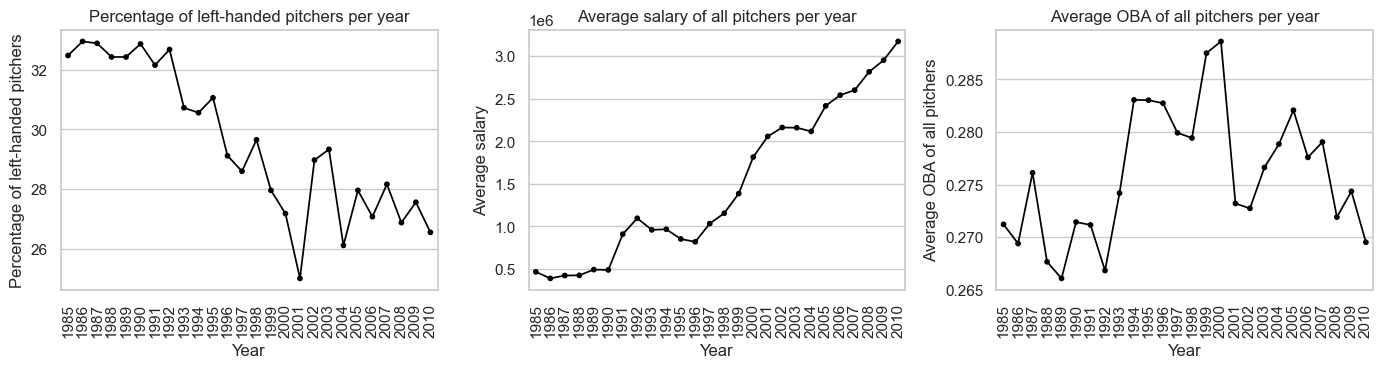

In [33]:
# Creating data frame with statistics requested in taks 3.2
df_stats = df.groupby('yearID').agg({
    'throws': lambda x: (x=='L').sum()/len(x)*100,
    'salary': 'mean',
    'BAOpp': 'mean'
}).rename(columns={'throws': 'perc_L_year'})

# Reducing linewidth setups and setting the grid
sns.set(style='whitegrid', rc={'lines.linewidth': 0.7})
# Defining plotting setups
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))

# Plotting the percentage of left-handed pitchers per year. Also customizing titles and labels
sns.pointplot(data=df_stats.reset_index(), x='yearID', y='perc_L_year', ax=ax1, color='black')
ax1.tick_params(axis='x', rotation = 90)
ax1.set_title('Percentage of left-handed pitchers per year')
ax1.set_ylabel('Percentage of left-handed pitchers')
ax1.set_xlabel('Year')

# Plotting the average salary of all pitchers per year. Also customizing titles and labels
sns.pointplot(data=df_stats.reset_index(), x='yearID', y='salary', ax=ax2, color='black')
ax2.tick_params(axis='x', rotation = 90)
ax2.set_title('Average salary of all pitchers per year')
ax2.set_ylabel('Average salary')
ax2.set_xlabel('Year')

# Plotting the average opponents' batting average of all pitchers per year. Also customizing titles and labels
sns.pointplot(data=df_stats.reset_index(), x='yearID', y='BAOpp', ax=ax3, color='black')
ax3.tick_params(axis='x', rotation = 90)
ax3.set_title('Average OBA of all pitchers per year')
ax3.set_ylabel('Average OBA of all pitchers')
ax3.set_xlabel('Year')

# Plotting so it fits in the figure
plt.tight_layout()
plt.show()

In [41]:
# Printing the average percentage of left-handed pitchers in 2007, the average salary and the OBA for all pitchers in 2007
print(f'The average percentage of left-handed pitchers in 2007 is {(df_stats.loc[2007]["perc_L_year"]):.2f}%')
print(f'The average salary in 2007 is {(df_stats.loc[2007]["salary"]):.2e}')
print(f'The average opponents\' batting average (OBA) in 2007 is {(df_stats.loc[2007]["BAOpp"]):.2f}')

The average percentage of left-handed pitchers in 2007 is 28.16%
The average salary in 2007 is 2.60e+06
The average opponents' batting average (OBA) in 2007 is 0.28


**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

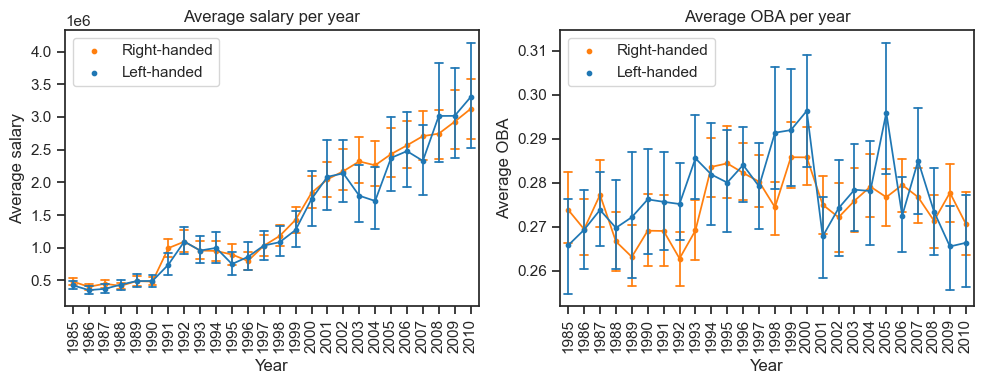

In [37]:
# Changing the layout of the plots
sns.set(style='ticks', rc={'lines.linewidth': 0.7})
# Defining plotting setups
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# Plotting the average salary for left- and right-handed pitchers per year with 95% CI.
# Also customizing titles, axis labels and legend
sns.pointplot(data=df, x='yearID', y='salary', errorbar=('ci', 95), hue='throws', ax=ax1, palette=col_palette, hue_order=['R','L'], capsize=.5)
ax1.tick_params(axis='x', rotation = 90)
ax1.set_title('Average salary per year')
ax1.set_ylabel('Average salary')
ax1.set_xlabel('Year')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, [custom_labels.get(label) for label in labels], title='')

# Plotting the average opponents' batting average for left- and right-handed pitchers per year with 95% CI.
# Also customizing titles, axis labels and legend
sns.pointplot(data=df, x='yearID', y='BAOpp', errorbar=('ci', 95), hue='throws', ax=ax2, palette=col_palette, hue_order=['R','L'], capsize=.5)
ax2.tick_params(axis='x', rotation = 90)
ax2.set_title('Average OBA per year')
ax2.set_ylabel('Average OBA')
ax2.set_xlabel('Year')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, [custom_labels.get(label) for label in labels], title='')

# Plotting so it fits in the figure
plt.tight_layout()
plt.show()

In [40]:
print(f'The average salary in 1999 for left-handed pitchers is {(df[(df.yearID == 1999) & (df.throws == "L")]["salary"].mean()):.2e}')
print(f'The average opponents\' batting average in 1999 for right-handed pitchers is {(df[(df.yearID == 1999) & (df.throws == "R")]["BAOpp"].mean()):.2f}')

The average salary in 1999 for left-handed pitchers is 1.27e+06
The average opponents' batting average in 1999 for right-handed pitchers is 0.29


**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.2 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

<span style="color:green">OUR ANSWER:

In section 2.7 and 2.8 we performed t-tests to see if the overall mean of the salary and OBA distributions were statistically different. In both cases, we were able to reject the null hypothesis and thus we had to explore more the data to verify this. Furthermore, it seemed like that right-handed pitchers were earning more and performing better. 

Nevertheless, in sections 3.1/3.2/3.3 we disaggregated the data by plotting both distributions per year. By visual inspection, we observed a decreasing trend in the percentage of left-handed pitchers over the years and a monotonically increasing salary. Regarding the OBA, up to year 2000 there was an increase that seems to be anti-correlated with the percentage of left-handed players. This is specially relevant for the year 2000 where we see a peak in the OBA and a pitfall in the percentage of left-handed players. Taking into account that higher value in OBA is associated to a worse performance, one could think that left-handed players perform better since for the year 2000 their percentage decreased.

However, according to the statistical test performed in section 3.1 there was no significant difference between left- and right-handed players in terms of salary and OBA for the year 2000. Moreover, section 3.3 supports this idea since the OBA distributions fluctuate in a similar way and the confidence intervals overlap. The increasing salary and the decreasing percentage of left-handed players show no direct causal relation since in section 3.3 the salaries plots coincide regardless of the pitcher group.

Having this overview of both aggregated (2.7/2.8) and not-aggregated data (3.1/3.2/3.3) across the years we observe that the initial analysis about the right-handed pitchers earning more and performing better disappears. This suggests us we are dealing with the simpons's paradox. 

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


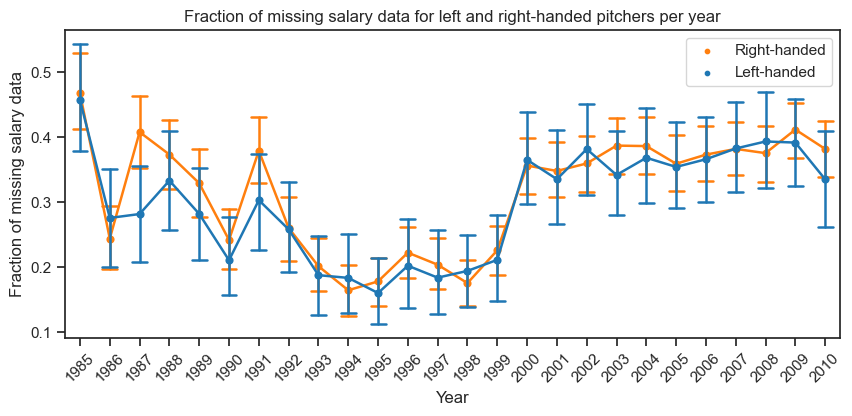

In [31]:
# Incraesing linewidth setups
sns.set(style='ticks', rc={'lines.linewidth': 1})
# Defining plotting setups
fig, ax = plt.subplots(figsize=(10,4))

# Creating a categorical column taking 1 for NaN values in the salary column and 0 for the others
df['salary_cat'] = df.salary.isna().astype(int)

# Plotting the fraction of missing salary data for left and right-handed pitchers per year with 95% CI.
# Also customizing titles, axis labels and legend
sns.pointplot(data=df, x='yearID', y='salary_cat', hue='throws', errorbar=('ci', 95), palette=col_palette, hue_order=['R','L'], capsize=.5)
ax.set_ylabel('Fraction of missing salary data')
ax.set_xlabel('Year')
ax.set_title('Fraction of missing salary data for left and right-handed pitchers per year')
ax.tick_params(axis='x', rotation = 45)
handles, labels = ax2.get_legend_handles_labels()
ax.legend(handles, [custom_labels.get(label) for label in labels], title='')

# Plotting
plt.show()

In [50]:
# Calculating the fraction of missing salary data for left-handed pitchers in 2002
fraction_2002_L = df[(df.throws == 'L') & (df.yearID == 2002)]['salary'].isna().sum() / len(df[(df.throws == 'L') & (df.yearID == 2002)]['salary'])
print(f'The fraction of left-handed pitchers with salary data missing for the year 2002 is {(fraction_2002_L):.2f}')

The fraction of left-handed pitchers with salary data missing for the year 2002 is 0.38


<span style="color:green">OUR ANSWER:

Based on the plot it seems that there's significant difference in terms of fraction of missing data regarding the salaries for both players. Indeed, both plots follow the same trend. Only in the year 1987 the right-handed pitchers have a slightly higher fraction of missing data although the confidence intervals still overlap.

**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?

<span style="color:green">OUR ANSWER:

Looking at the average mean salary plot over the years (see section 3.3), the confidence intervals for the right-handed players are very narrow we could expect that the kept data would follow the same trend. However, removing a large fraction of data can lead to the following problems:
1. Kept values would have higher impact on the averages and thus biasing the analysis
2. The observe trends of the distribution would only correspond to the kept data
3. The significant tests would also be cursed

As a final remark, the overall analysis we have performed has already been influenced by the lower size of the left-handed pitchers data.